# Problem Statement - Predicting Lead Categories to Improve Sales Effectiveness

FicZon Inc is experiencing declining sales due to increased competition in the market.

To boost sales effectiveness, they need a faster and more accurate way to identify high-quality leads.

The current manual lead categorization process is causing delays in engaging potential customers, leading to missed opportunities.

FicZon aims to explore Machine Learning to pre-categorize leads and expects this approach to result in significant sales improvement.

The objective of this project is to implement a Machine Learning-based lead classification system that pre-categorizes leads based on their quality.

The goal is to enhance sales effectiveness by enabling the sales team to prioritize high-quality leads and allocate resources efficiently.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 


C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#To connect to a MySQL database from a Jupyter Notebook, you can use the pymysql library which allows Python
#to interact with MySQL databases
from sqlalchemy import create_engine , inspect
from urllib.parse import quote_plus


In [3]:
pip install pymysql


Note: you may need to restart the kernel to use updated packages.


# Importing Raw Data 

In [4]:
DB_Name: 'project_sales'
Host: '18.136.157.135'
UserName: 'dm_team2'
Password: 'DM!$Team&27@9!20!'

In [5]:
db_host = '18.136.157.135'
username = 'dm_team2'
user_pass = 'DM!$Team&27@9!20!'
db_name = 'project_sales'

# Encode the password to handle special characters
encoded_pass = quote_plus(user_pass)

# Create connection string
connection_string = f'mysql+pymysql://{username}:{encoded_pass}@{db_host}/{db_name}'


In [6]:
engine = create_engine(connection_string)

# Fetch table names
table_names = engine.table_names()

# Display table names
print("Table Names:")
for table_name in table_names:
    print(table_name)

Table Names:
data


In [7]:
query = 'select * from data'

In [8]:
# Importing raw data through SQL Server
data = pd.read_sql(query,connection_string)

# Basic Checks

In [9]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [10]:
data.tail()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry
7421,28-04-2018 07:54,25,Website,,cXXXXXXX@gmail.com,Sales-Agent-3,Chennai,Mode-1,CONVERTED


In [11]:
#shape of data 
data.shape

(7422, 9)

In [12]:
#datatypes of all the features 
data.dtypes

Created          object
Product_ID       object
Source           object
Mobile           object
EMAIL            object
Sales_Agent      object
Location         object
Delivery_Mode    object
Status           object
dtype: object

In [13]:
data.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

In [14]:
#information of all the features 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7422 non-null   object
 2   Source         7422 non-null   object
 3   Mobile         7422 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7422 non-null   object
 6   Location       7422 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB


In [15]:
#statistical analysis of the data 
data.describe()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7422,7422,7422,7422,7422,7422,7422,7422
unique,6752,30,26,487,883,13,18,5,11
top,26-09-2018 11:30,18,Call,,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,1711,2547,1810,1701,1500,2500,2975,1536


# Exploratory Data Analysis / Feature Engineering 

# Univariant Analysis 

1.Source

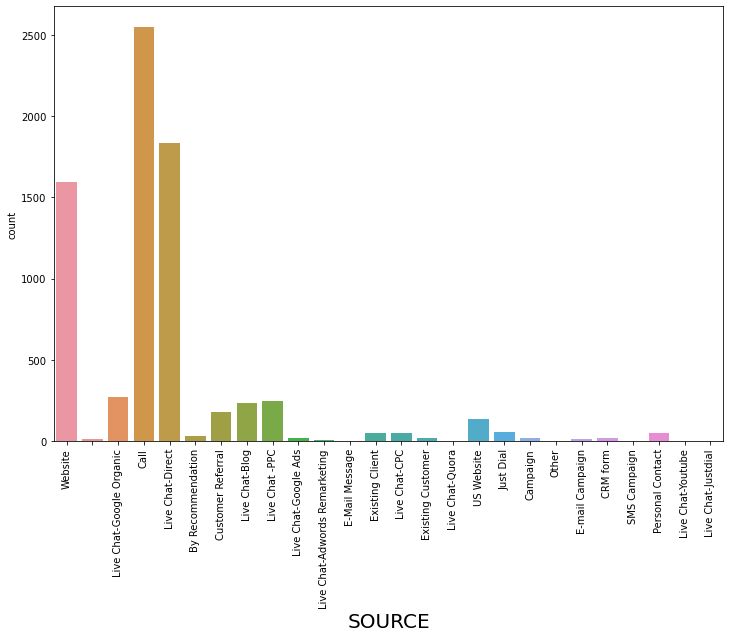

In [16]:
plt.figure(figsize=(12,8))
sns.countplot(data.Source)
plt.xticks(rotation=90)
plt.xlabel('SOURCE',fontsize=20)
plt.show()

Insights:

34 % Leads were generarted from Call Source .

25 % Leads were Generated from live direct chat .

21 % Leads were generated from their Website .

11 % Leads were generated from Live chat in Google , PPC , Blog and US Website.

remaining 10 % leads were generated from other sources .

2.Sales_Agent

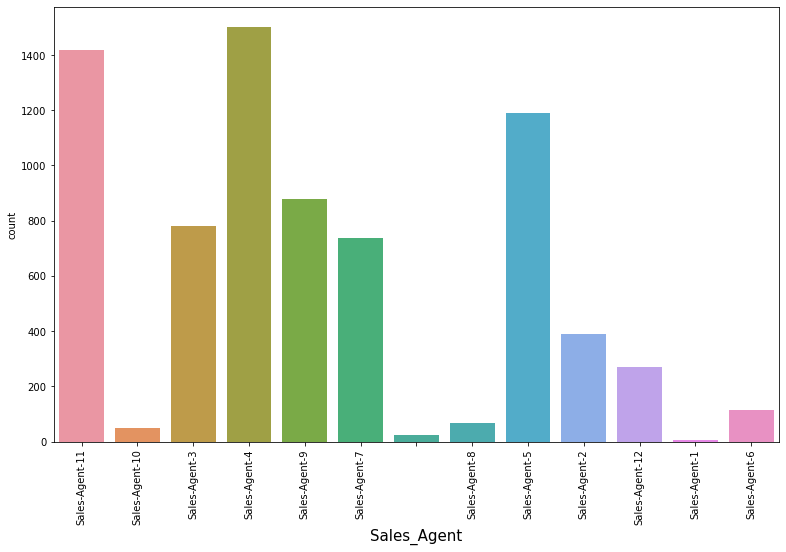

In [17]:
plt.figure(figsize=(13,8))
sns.countplot(data.Sales_Agent)
plt.xticks(rotation=90)
plt.xlabel('Sales_Agent', fontsize=15)
plt.show()

Insights:

Agent-3 , Agent-4 , Agent-5 , Agent-7 , Agent-9 and Agent-11 togatherly Generated More than 87 % Leads.

Agent-1 , Agent-2 , Agent-6 , Agent-8 , Agent-10 and Agent-12 are togatherly Generated less than 13 % Leads.

3.Location

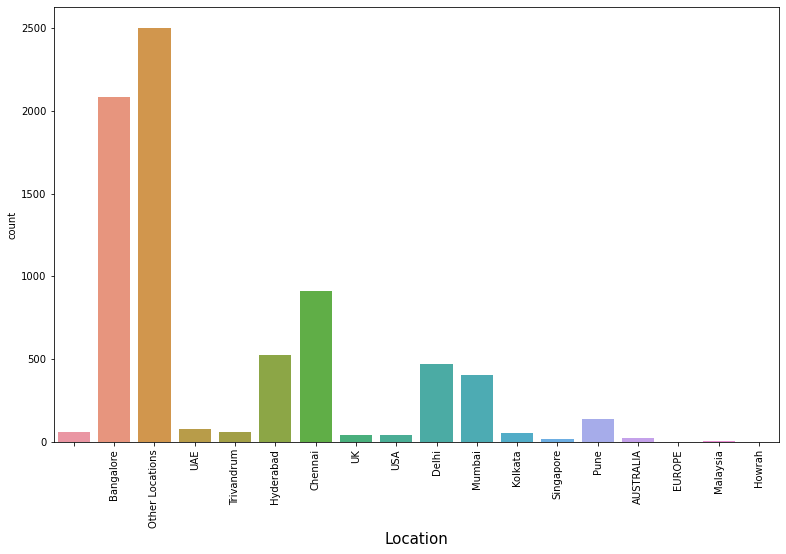

In [18]:
plt.figure(figsize=(13,8))
sns.countplot(data.Location)
plt.xticks(rotation=90)
plt.xlabel('Location', fontsize=15)
plt.show()

Insights:

33 % Leads were generated from Other Locations.

from Bangalore 28% and Chennai 12% Leads were Generated.

From Hyderabad 7% , Delhi 6% and Mumbai 5% Leads were Generated.


4.Delivery_Mode

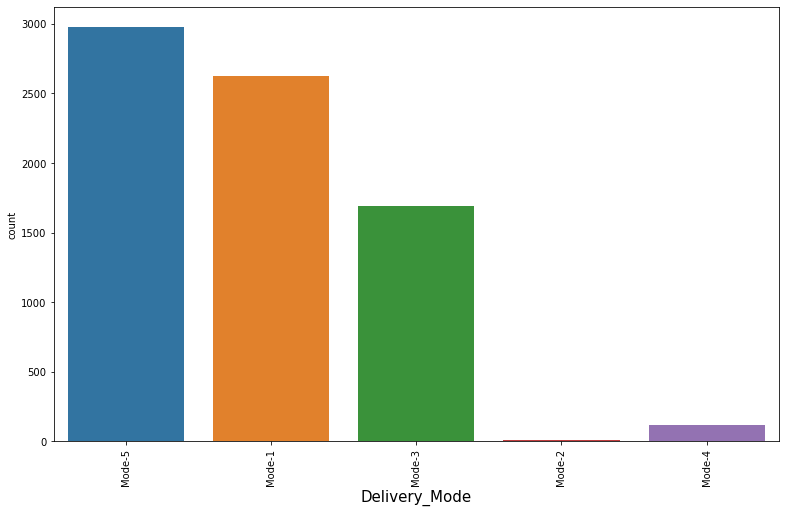

In [19]:
plt.figure(figsize=(13,8))
sns.countplot(data.Delivery_Mode)
plt.xticks(rotation=90)
plt.xlabel('Delivery_Mode', fontsize=15)
plt.show()

Insights:

Most of Leads prefered Mode-5 , Mode-1 ,Mode-3

5.Status

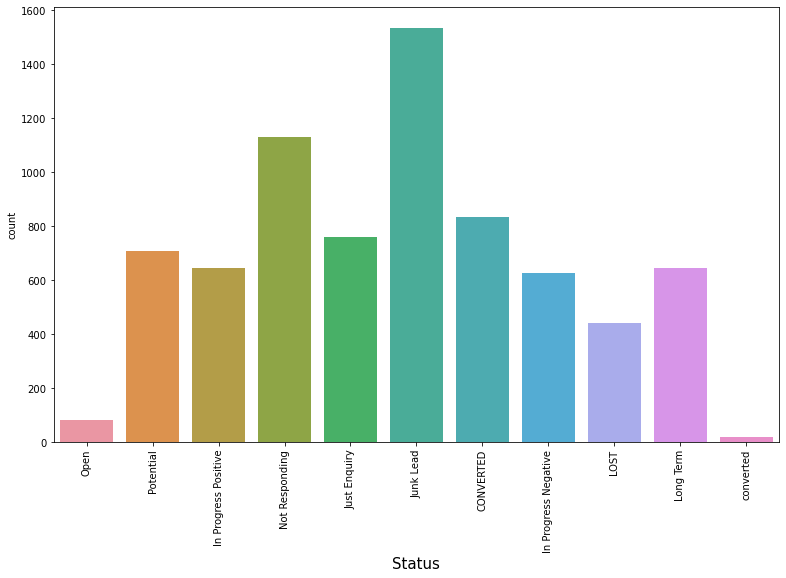

In [20]:
plt.figure(figsize=(13,8))
sns.countplot(data.Status)
plt.xticks(rotation=90)
plt.xlabel('Status', fontsize=15)
plt.show()

Insights:

20 % Leads which are generated , they are Junk Leads.

15 % Leads were Not Responding.

11 % Leads got Convorted .(Successed)

10 % Leads are just Enquired.

We cannot Perform Bivariant analysis , no numeric columns is present in our data 

# Data Preprocessing and Feature Engineering 

In [21]:
#dropping irrelevant colulmns 
data.drop(columns=['Created','Mobile','EMAIL'], inplace= True )
data

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,,Website,Sales-Agent-11,,Mode-5,Open
1,,Website,Sales-Agent-10,,Mode-5,Open
2,,Website,Sales-Agent-10,,Mode-5,Open
3,,Website,Sales-Agent-10,,Mode-5,Open
4,,Website,Sales-Agent-10,,Mode-5,Open
...,...,...,...,...,...,...
7417,9,Call,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,15,Call,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,5,Live Chat-Direct,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,21,CRM form,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


In [22]:
#checking null values

data.isnull().sum()

Product_ID       0
Source           0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

In [23]:
data

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,,Website,Sales-Agent-11,,Mode-5,Open
1,,Website,Sales-Agent-10,,Mode-5,Open
2,,Website,Sales-Agent-10,,Mode-5,Open
3,,Website,Sales-Agent-10,,Mode-5,Open
4,,Website,Sales-Agent-10,,Mode-5,Open
...,...,...,...,...,...,...
7417,9,Call,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,15,Call,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,5,Live Chat-Direct,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,21,CRM form,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


Missing values are present in data 

In [24]:
data.Product_ID.unique()

array(['', '9', '19', '18', '15', '27', '5', '2', '3', '25', '10', '20',
       '11', '21', '1', '12', '13', '17', '24', '26', '16', '23', '22',
       '8', '14', '6', '0', '28', '7', '4'], dtype=object)

In [25]:
data.Location.unique()

array(['', 'Bangalore', 'Other Locations', 'UAE', 'Trivandrum',
       'Hyderabad', 'Chennai', 'UK', 'USA', 'Delhi', 'Mumbai', 'Kolkata',
       'Singapore', 'Pune', 'AUSTRALIA', 'EUROPE', 'Malaysia', 'Howrah'],
      dtype=object)

Product_ID and Location features contains missing value 

# Replacing empty strings with NaN value 

In [26]:
data.replace('',pd.NA,inplace=True)

In [27]:
data

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,<NA>,Website,Sales-Agent-11,<NA>,Mode-5,Open
1,<NA>,Website,Sales-Agent-10,<NA>,Mode-5,Open
2,<NA>,Website,Sales-Agent-10,<NA>,Mode-5,Open
3,<NA>,Website,Sales-Agent-10,<NA>,Mode-5,Open
4,<NA>,Website,Sales-Agent-10,<NA>,Mode-5,Open
...,...,...,...,...,...,...
7417,9,Call,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,15,Call,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,5,Live Chat-Direct,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,21,CRM form,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


In [28]:
data.isnull().sum()

Product_ID       58
Source           17
Sales_Agent      23
Location         58
Delivery_Mode     0
Status            0
dtype: int64

Removing Missing rows

In [29]:
data.dropna(subset=['Product_ID','Source','Sales_Agent','Location'],inplace = True)

In [30]:
data

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
18,9,Live Chat-Google Organic,Sales-Agent-3,Bangalore,Mode-1,Potential
19,19,Call,Sales-Agent-4,Other Locations,Mode-5,Potential
24,18,Website,Sales-Agent-11,Trivandrum,Mode-1,Potential
25,15,Website,Sales-Agent-7,Hyderabad,Mode-1,Not Responding
26,18,Call,Sales-Agent-7,Bangalore,Mode-1,In Progress Positive
...,...,...,...,...,...,...
7417,9,Call,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,15,Call,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,5,Live Chat-Direct,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,21,CRM form,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


In [31]:
#checking 
data.isnull().sum()

Product_ID       0
Source           0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

# Defining Sources

In [32]:
data['Source'].unique()

array(['Live Chat-Google Organic', 'Call', 'Website', 'Live Chat-Direct',
       'By Recommendation', 'Customer Referral', 'Live Chat-Blog',
       'Live Chat -PPC', 'Live Chat-Google Ads',
       'Live Chat-Adwords Remarketing', 'E-Mail Message',
       'Existing Client', 'Live Chat-CPC', 'Existing Customer',
       'Live Chat-Quora', 'US Website', 'Just Dial', 'Campaign', 'Other',
       'E-mail Campaign', 'CRM form', 'SMS Campaign', 'Personal Contact',
       'Live Chat-Youtube', 'Live Chat-Justdial'], dtype=object)

In [33]:
data.Source.replace(['Live Chat-Google Organic','Live Chat-Direct','Live Chat-Blog', 'Live Chat -PPC', 'Live Chat-Google Ads',
       'Live Chat-Adwords Remarketing','Live Chat-CPC','Live Chat-Quora','Live Chat-Youtube', 'Live Chat-Justdial'], 'Live Chat',inplace=True)

In [34]:
data.Source.replace(['Existing Client','CRM form','Personal Contact'],'Existing Customer',inplace=True)
data.Source.replace('By Recommendation','Customer Referral',inplace=True)
data.Source.replace(['US Website','Just Dial'],'Website',inplace=True)
data.Source.replace(['E-mail Campaign','SMS Campaign','E-Mail Message','Other'],'Campaign',inplace=True)

In [35]:
data['Source'].unique()

array(['Live Chat', 'Call', 'Website', 'Customer Referral', 'Campaign',
       'Existing Customer'], dtype=object)

# Defining Location

In [36]:
data['Location'].unique()

array(['Bangalore', 'Other Locations', 'Trivandrum', 'Hyderabad',
       'Chennai', 'UK', 'USA', 'Delhi', 'UAE', 'Mumbai', 'Kolkata',
       'Singapore', 'Pune', 'AUSTRALIA', 'EUROPE', 'Malaysia', 'Howrah'],
      dtype=object)

In [37]:
data.Location.replace(['Bangalore','Trivandrum','Hyderabad',
       'Chennai', 'Delhi', 'Mumbai','Pune','Kolkata', 'Howrah'], 'India', inplace= True)

In [38]:
data.Location.replace(['UK','USA','UAE','Singapore','AUSTRALIA','EUROPE','Malaysia'],'Foreign',inplace = True)

In [39]:
data['Location'].unique()

array(['India', 'Other Locations', 'Foreign'], dtype=object)

# Defining status as low potential and high potential

In [40]:
data['Status'].unique()

array(['Potential', 'Not Responding', 'In Progress Positive',
       'Just Enquiry', 'Junk Lead', 'CONVERTED', 'In Progress Negative',
       'Open', 'LOST', 'Long Term', 'converted'], dtype=object)

In [41]:
data.Status.replace(['Potential','In Progress Positive','Long Term','Open','CONVERTED','converted'], 'Good',inplace=True)

In [42]:
data.Status.replace(['Not Responding','Just Enquiry', 'Junk Lead','In Progress Negative','LOST'], 'Bad',inplace = True)

In [43]:
data['Status'].unique()

array(['Good', 'Bad'], dtype=object)

In [44]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
18,9,Live Chat,Sales-Agent-3,India,Mode-1,Good
19,19,Call,Sales-Agent-4,Other Locations,Mode-5,Good
24,18,Website,Sales-Agent-11,India,Mode-1,Good
25,15,Website,Sales-Agent-7,India,Mode-1,Bad
26,18,Call,Sales-Agent-7,India,Mode-1,Good


# Bivariant Analysis

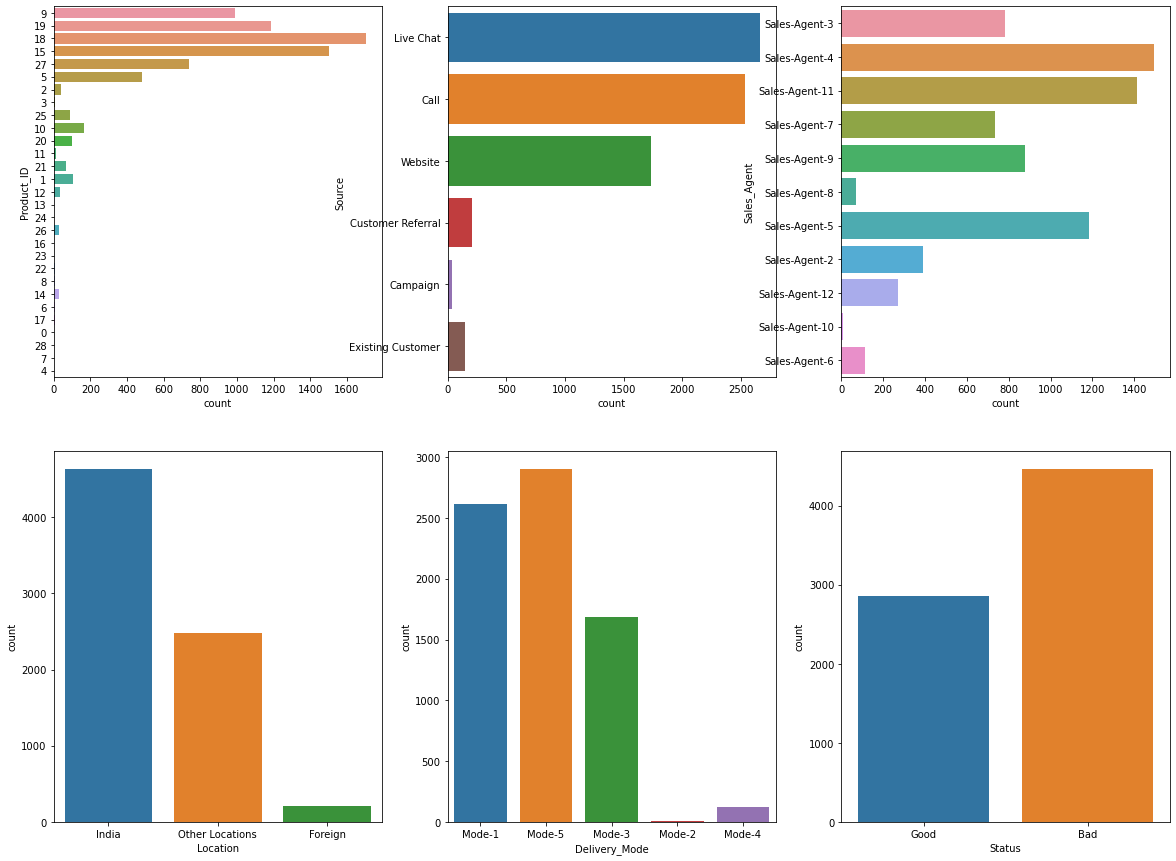

In [45]:
plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
sns.countplot(y='Product_ID',data=data)
plt.subplot(2,3,2)
sns.countplot(y='Source',data=data)
plt.subplot(2,3,3)
sns.countplot(y='Sales_Agent',data=data)
plt.subplot(2,3,4)
sns.countplot(x='Location',data=data)
plt.subplot(2,3,5)
sns.countplot(x='Delivery_Mode',data=data)
plt.subplot(2,3,6)
sns.countplot(x='Status',data=data)
plt.show()

Data Visualize 

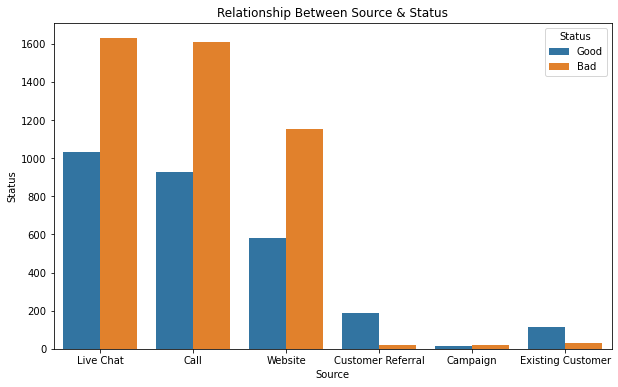

In [46]:
plt.figure(figsize=(10,6))
sns.countplot(x='Source',hue='Status',data=data)
plt.xlabel("Source")
plt.ylabel("Status")
plt.title("Relationship Between Source & Status")
plt.show()

Insights from the above plot :
Among the different lead sources, Customer Referral, Campaign, and Existing Customer have less than 200 leads each. This indicates that the lead generation from these sources might require improvement or additional strategies.

Live Chat and Call, on the other hand, have a nearly balanced proportion of high potential and low potential leads. They both have a total of 1000 high potential leads and 1600 low potential leads, suggesting effective lead engagement through these channels.

For Website as a lead source, there are 590 high potential leads and 1150 low potential leads. This indicates that while the website is generating a substantial number of leads, there is a higher proportion of low potential leads compared to high potential leads.

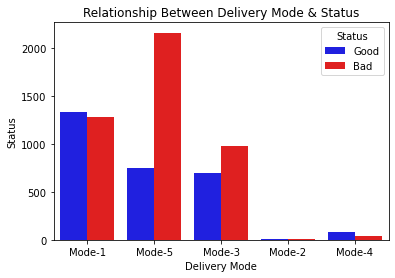

In [47]:
sns.countplot(x='Delivery_Mode',hue='Status',data=data,palette={'Bad': 'red', 'Good': 'blue'})
plt.xlabel("Delivery Mode")
plt.ylabel("Status")
plt.title("Relationship Between Delivery Mode & Status")
plt.show()

Insights from the above plot :
In the context of Delivery Mode, Mode-1 yields 1400 high potential leads and 1300 low potential leads, suggesting a balanced performance in lead generation. However, Mode-5 delivers 700 high potential leads but has a significantly higher count of over 2000 low potential leads, indicating a potential inefficiency in lead targeting.

On the other hand, Mode-2 and Mode-4 have near-zero leads, implying minimal or ineffective lead generation through these modes.

Meanwhile, Mode-3 represents a medium-level performance in lead generation, without any significant skew towards either high or low potential leads.

To optimize lead generation and sales effectiveness, it is essential to evaluate and refine the lead acquisition strategies for Modes 1, 5, and 3. Additionally, efforts should be made to improve the lead generation methods for Modes 2 and 4, to ensure a balanced and successful lead pipeline across all delivery modes.

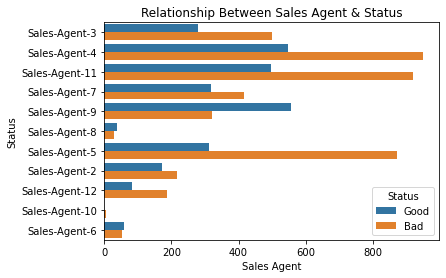

In [48]:
sns.countplot(y='Sales_Agent',hue='Status',data=data)
plt.xlabel("Sales Agent")
plt.ylabel("Status")
plt.title("Relationship Between Sales Agent & Status")
plt.show()

Insights from the above plot :
Among the sales agents, Sales Agent 4, 11, and 9 have the highest count of Low Potential leads, but interestingly, they also have the highest count of High Potential leads compared to all other sales agents.

This indicates that these agents are effective in engaging with both Low and High Potential leads.

On the other hand, Sales Agent 8, 2, 10, and 6 have less than 200 leads in their respective counts.

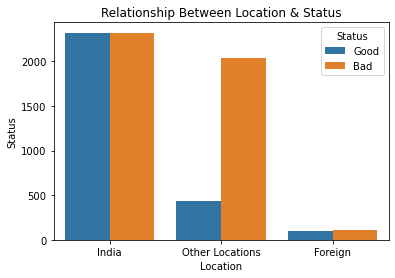

In [49]:
sns.countplot(x='Location',hue='Status',data=data)
plt.xlabel("Location")
plt.ylabel("Status")
plt.title("Relationship Between Location & Status")
plt.show()

Insights from the above plot :
In India, the proportion of High Potential and Low Potential locations is balanced. However, in other regions, Low Potential locations have a higher count compared to High Potential locations. Additionally, foreign locations have a very low count for both High and Low Potential regions.

In [50]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
18,9,Live Chat,Sales-Agent-3,India,Mode-1,Good
19,19,Call,Sales-Agent-4,Other Locations,Mode-5,Good
24,18,Website,Sales-Agent-11,India,Mode-1,Good
25,15,Website,Sales-Agent-7,India,Mode-1,Bad
26,18,Call,Sales-Agent-7,India,Mode-1,Good


# Label Encoding 

1. Source

In [51]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
lb

LabelEncoder()

In [52]:
data['Source']=lb.fit_transform(data['Source'])


In [53]:
#Checking 

data['Source']

18      4
19      0
24      5
25      5
26      0
       ..
7417    0
7418    0
7419    4
7420    3
7421    5
Name: Source, Length: 7328, dtype: int32

2. Sales_Agent

In [54]:
columns = data.columns
columns

Index(['Product_ID', 'Source', 'Sales_Agent', 'Location', 'Delivery_Mode',
       'Status'],
      dtype='object')

In [55]:
for col in columns:
        data[col] = lb.fit_transform(data[col])

In [56]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
18,28,4,4,1,0,1
19,11,0,5,2,4,1
24,10,5,1,1,0,1
25,7,5,8,1,0,0
26,10,0,8,1,0,1


In [57]:
data.dtypes

Product_ID       int32
Source           int64
Sales_Agent      int32
Location         int32
Delivery_Mode    int32
Status           int32
dtype: object

In [58]:
data.Status.value_counts()


0    4466
1    2862
Name: Status, dtype: int64

Status feature contains imbalanced class distribution with 4466 instance in 0 class and 2862 instance with class 1.To address this, we employ the SMOTE technique to balance the dataset and enhance the accuracy of predictive models.

# Checking Outlier 

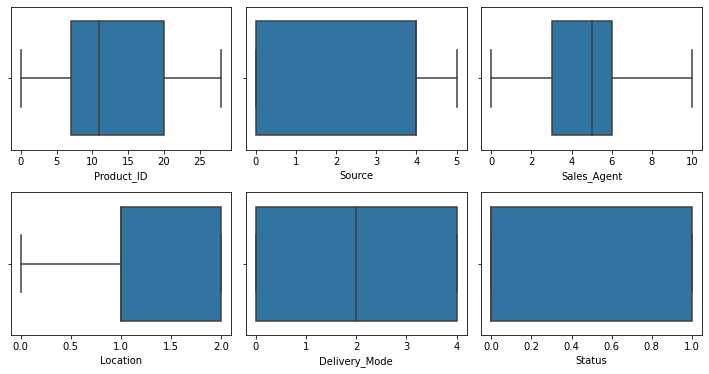

In [59]:
plt.figure(figsize=(10,10))
plotnumber = 1
for i in data.columns:
    plt.subplot(4,3,plotnumber)
    sns.boxplot(x = data[i])
    plotnumber = plotnumber + 1
plt.tight_layout()

No outlier is present.

# Balancing data using SMOTE oversampling Technique 

In [60]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE()
sm

SMOTE()

In [61]:
X = data.drop(['Status'], axis =1 )
y = data.Status

In [62]:
X

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode
18,28,4,4,1,0
19,11,0,5,2,4
24,10,5,1,1,0
25,7,5,8,1,0
26,10,0,8,1,0
...,...,...,...,...,...
7417,28,0,7,1,3
7418,7,0,2,2,4
7419,24,4,1,1,0
7420,14,3,5,2,0


In [63]:
y

18      1
19      1
24      1
25      0
26      1
       ..
7417    0
7418    0
7419    0
7420    0
7421    1
Name: Status, Length: 7328, dtype: int32

In [64]:
X_resampled , y_resampled = sm.fit_resample(X,y)

In [65]:
print(len(X))
print(len(y))

7328
7328


In [66]:
print(len(X))
print(len(X_resampled))

7328
8932


In [67]:
print(y_resampled.value_counts())

1    4466
0    4466
Name: Status, dtype: int64


# Feature Selection 

In [68]:
data.corr()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
Product_ID,1.000000,0.067209,0.062694,-0.268012,-0.179129,0.133166
Source,0.067209,1.000000,-0.023186,-0.113249,-0.216516,-0.015411
Sales_Agent,0.062694,-0.023186,1.000000,-0.067451,-0.224688,0.137074
Location,-0.268012,-0.113249,-0.067451,1.000000,0.297702,-0.293663
Delivery_Mode,-0.179129,-0.216516,-0.224688,0.297702,1.000000,-0.220445
Status,0.133166,-0.015411,0.137074,-0.293663,-0.220445,1.000000


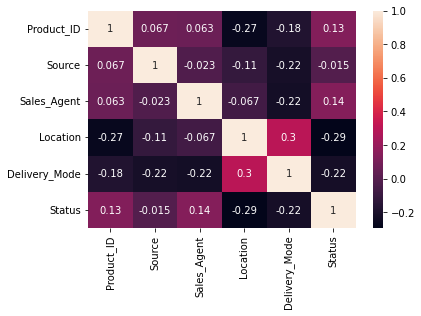

In [69]:
sns.heatmap(data.corr(), annot = True)
plt.show()

There are no significant correlations found among the features in the dataset.

# Model Creation 

Train Test Split

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)

In [71]:
X_train.shape

(7145, 5)

In [72]:
X_test.shape

(1787, 5)

In [73]:
X_train

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode
1470,11,0,5,1,0
5980,24,2,5,1,0
6955,24,3,1,1,4
3994,7,0,6,2,4
8474,11,0,10,1,0
...,...,...,...,...,...
5734,10,5,1,1,0
5191,11,5,10,1,2
5390,28,0,5,1,2
860,20,4,1,1,0


In [74]:
y_train.shape

(7145,)

In [75]:
y_test.shape

(1787,)

# 1. Logistic Regression 

In [76]:
from sklearn.linear_model import LogisticRegression 
LR = LogisticRegression()
LR

LogisticRegression()

In [77]:
LR.fit(X_train,y_train)

LogisticRegression()

In [78]:
y_pred_train = LR.predict(X_train)
y_pred_train

array([1, 1, 0, ..., 1, 1, 1])

In [79]:
y_pred_test = LR.predict(X_test)
y_pred_test

array([1, 1, 1, ..., 1, 1, 1])

# Model Accuracy

In [80]:
from sklearn.metrics import accuracy_score,classification_report,f1_score
#training score 
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.68      0.58      0.63      3603
           1       0.63      0.72      0.67      3542

    accuracy                           0.65      7145
   macro avg       0.66      0.65      0.65      7145
weighted avg       0.66      0.65      0.65      7145



In [81]:
from sklearn.metrics import accuracy_score,classification_report,f1_score
# Testing Score
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.65      0.60      0.62       863
           1       0.65      0.70      0.68       924

    accuracy                           0.65      1787
   macro avg       0.65      0.65      0.65      1787
weighted avg       0.65      0.65      0.65      1787



# 2. Support Vector Classifier 

In [82]:
from sklearn.svm import SVC
svc = SVC()
svc

SVC()

In [83]:
svc.fit(X_train,y_train)

SVC()

In [84]:
ypred= svc.predict(X_train)
ypred

array([1, 1, 0, ..., 1, 1, 1])

In [85]:
y_pred_test = svc.predict(X_test)
y_pred_test

array([1, 1, 1, ..., 1, 1, 1])

# Model Accuracy

In [86]:
from sklearn.metrics import accuracy_score,classification_report , f1_score
#training accuracy 
print(classification_report(y_train, ypred))

              precision    recall  f1-score   support

           0       0.71      0.58      0.64      3603
           1       0.64      0.76      0.70      3542

    accuracy                           0.67      7145
   macro avg       0.68      0.67      0.67      7145
weighted avg       0.68      0.67      0.67      7145



In [87]:
#testing accuracy
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.70      0.61      0.65       863
           1       0.68      0.75      0.71       924

    accuracy                           0.69      1787
   macro avg       0.69      0.68      0.68      1787
weighted avg       0.69      0.69      0.68      1787



# 3. Decision Tree classifier 

In [88]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC


DecisionTreeClassifier()

In [89]:
DTC.fit(X_train,y_train)

DecisionTreeClassifier()

In [90]:
y_pred_train = DTC.predict(X_train)
y_pred_train

array([1, 1, 1, ..., 1, 1, 1])

In [91]:
y_pred_test = DTC.predict(X_test)
y_pred_test

array([0, 1, 0, ..., 1, 1, 1])

# Model Accuracy 

In [92]:
#training accuracy 
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79      3603
           1       0.78      0.79      0.79      3542

    accuracy                           0.79      7145
   macro avg       0.79      0.79      0.79      7145
weighted avg       0.79      0.79      0.79      7145



In [93]:
#testing accuracy 
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.70      0.71      0.70       863
           1       0.72      0.72      0.72       924

    accuracy                           0.71      1787
   macro avg       0.71      0.71      0.71      1787
weighted avg       0.71      0.71      0.71      1787



# 4.Random Forest Classifier 

In [94]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc

RandomForestClassifier()

In [95]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [96]:
y_pred_train = rfc.predict(X_train)
y_pred_train

array([1, 1, 1, ..., 1, 1, 1])

In [97]:
y_pred_test = rfc.predict(X_test)
y_pred_test

array([0, 1, 0, ..., 1, 1, 1])

# Model Accuracy 

In [98]:
#training accuracy 
print(classification_report(y_train,y_pred_train))
    

              precision    recall  f1-score   support

           0       0.81      0.76      0.78      3603
           1       0.77      0.81      0.79      3542

    accuracy                           0.79      7145
   macro avg       0.79      0.79      0.79      7145
weighted avg       0.79      0.79      0.79      7145



In [99]:
#testing accuracy 
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70       863
           1       0.72      0.73      0.73       924

    accuracy                           0.71      1787
   macro avg       0.71      0.71      0.71      1787
weighted avg       0.71      0.71      0.71      1787



# Hyperparameter Tuning Using GridSearchCV (Decision Tree)

In [100]:
from sklearn.model_selection import GridSearchCV
# Hyper parameters for decision tree
params = {
    'criterion':('ginni','entropy'),
    'splitter':('best','random'),
    'max_depth':(list(range(1,20))),
    'min_samples_split':(list(range(1,20))),
    'min_samples_leaf':(list(range(1,20)))
}

dtc_tree = DecisionTreeClassifier(random_state=23)
dtc_tree_cv = GridSearchCV(dtc_tree,params,verbose=2,n_jobs=-1,cv=5,scoring='accuracy')

dtc_tree_cv.fit(X_train,y_train) # Training the data on GridSearchCV
best_parameters = dtc_tree_cv.best_params_ # it will give us best parameters
# Printing the best parameters for further predictions
print('best_parameters:',best_parameters)

Fitting 5 folds for each of 27436 candidates, totalling 137180 fits
best_parameters: {'criterion': 'entropy', 'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'}


In [101]:
dtclassifier = DecisionTreeClassifier(criterion= 'entropy', max_depth= 17, min_samples_leaf= 1, min_samples_split= 12, splitter= 'best',random_state=42)

In [102]:
dtclassifier.fit(X_train,y_train)
y_pred_dt = dtclassifier.predict(X_test)
y_pred_dttrain = dtclassifier.predict(X_train)

In [103]:
# Testing score
print(classification_report(y_test,y_pred_dt))


              precision    recall  f1-score   support

           0       0.69      0.71      0.70       863
           1       0.73      0.71      0.72       924

    accuracy                           0.71      1787
   macro avg       0.71      0.71      0.71      1787
weighted avg       0.71      0.71      0.71      1787



In [104]:
# training score
print(classification_report(y_train,y_pred_dttrain))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77      3603
           1       0.77      0.78      0.77      3542

    accuracy                           0.77      7145
   macro avg       0.77      0.77      0.77      7145
weighted avg       0.77      0.77      0.77      7145



# Hyperparameter Tuning using Randomized Search (Random Forest)

In [105]:
from sklearn.model_selection import RandomizedSearchCV
# Hyper parameters for Random Forest
param_grid = {
    'n_estimators':[400,600,800,1000,1200,1400,1600,1800,2000,2200],
    'max_depth':(list(range(1,13))),
    'min_samples_split':(list(range(1,9))),
    'min_samples_leaf':(list(range(1,6))),
    'max_features':['auto','sqrt'],
    'bootstrap':[True,False]}

rfclassifier = RandomForestClassifier(random_state=43)
rf_tree_rcv = RandomizedSearchCV(rfclassifier,param_grid,verbose=2,n_jobs=-1,cv=3,n_iter=100,scoring='accuracy')

rf_tree_rcv.fit(X_train,y_train) # Training the data on GridSearchCV

best_parameters1 = rf_tree_rcv.best_params_
# printing best parameters for further prediction
print('best parameters:',best_parameters1)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
best parameters: {'n_estimators': 1400, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}


In [106]:
rfclassifier = RandomForestClassifier()

In [107]:
rfclassifier.fit(X_train,y_train)

RandomForestClassifier()

# K- Nearest Neighbor Classifier 

In [108]:
from sklearn.neighbors import KNeighborsClassifier 
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [109]:
y_pred_train = KNN.predict(X_train)
y_pred_train

array([1, 1, 1, ..., 1, 1, 1])

In [110]:
y_pred_test = KNN.predict(X_test)
y_pred_test

array([0, 1, 0, ..., 1, 1, 1])

# Model Evalution

In [111]:
#Training accuracy 
print(classification_report(y_train,y_pred_train))


              precision    recall  f1-score   support

           0       0.77      0.71      0.74      3603
           1       0.73      0.79      0.75      3542

    accuracy                           0.75      7145
   macro avg       0.75      0.75      0.75      7145
weighted avg       0.75      0.75      0.75      7145



In [112]:
#Testing accuracy 
print(classification_report(y_test,y_pred_test))



              precision    recall  f1-score   support

           0       0.69      0.68      0.68       863
           1       0.70      0.71      0.71       924

    accuracy                           0.69      1787
   macro avg       0.69      0.69      0.69      1787
weighted avg       0.69      0.69      0.69      1787



# XGboost Classifier 

In [113]:
from xgboost import XGBClassifier
XGB_Model = XGBClassifier()
XGB_Model


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [114]:
XGB_Model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [115]:
y_pred = XGB_Model.predict(X_train)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [116]:
y_pred = XGB_Model.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 1, 1])

# Model Evalution

In [117]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.69      0.70       863
           1       0.72      0.75      0.73       924

    accuracy                           0.72      1787
   macro avg       0.72      0.72      0.72      1787
weighted avg       0.72      0.72      0.72      1787



# Hyperparameter 

In [118]:
param_dist = {'learning_rate':[0.0001,0.001,0.01,0.1],
             'max_depth':[3,4,5,6,8],
             'colsample_bytree':[0.5,0.6,0.7,0.8],
             'gamma':[0.1,0.2,0.3,0.4]}


In [119]:
grid = GridSearchCV(XGB_Model,param_grid=param_dist,cv=10)

In [120]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=N

In [121]:
grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [122]:
grid.best_score_

0.7189624101388807

In [123]:
grid.best_params_

{'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 8}

# Bernoulli Naive Bayes

In [124]:
from sklearn.naive_bayes import BernoulliNB
BNB_Model = BernoulliNB()
BNB_Model

BernoulliNB()

In [125]:
BNB_Model.fit(X_train,y_train)

BernoulliNB()

In [126]:
y_pred = BNB_Model.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 1, 1])

In [127]:
accuracy_score(y_test,y_pred)

0.5892557358701734

# Model Evalution

In [128]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.69      0.62       863
           1       0.63      0.50      0.56       924

    accuracy                           0.59      1787
   macro avg       0.60      0.59      0.59      1787
weighted avg       0.60      0.59      0.59      1787



# Conclusion: 


    
    
We tried 7 different models as our first step in modelling process, to evaluate & choose the best model as our baseline model.

Earlier, the Decision Tree Classifier, Random Forest Classifier, and XGBoost Classifier outperformed Support Vector Machine and K-Nearest Neighbor in terms of performance. However, Logistic Regression and Naive Bayes showed lower accuracy.

To further improve the accuracy of the top three algorithms, we applied hyperparameter tuning using GridSearch Cross Validation.

Decision Tree Classifier: We tuned hyperparameters like max depth, minimum samples per leaf, and the splitting criterion (gini or entropy) to find the best configuration that maximizes accuracy.

Random Forest Classifier: For Random Forest, we optimized hyperparameters such as the number of trees (n_estimators), maximum depth of trees, minimum samples per leaf, and the splitting criterion.

XGBoost Classifier: In XGBoost, we tuned parameters like the learning rate, number of boosting rounds (n_estimators), maximum depth of trees, and the regularization parameters (gamma and lambda).

After hyperparameter tuning, the XGBoost Classifier achieved the highest accuracy of 72%.